In [ ]:
#  Importing Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [ ]:

df1 = pd.read_csv("pakwheels_used_cars (1).csv")

df2 = pd.read_csv("weather_classification_data (1).csv")

print("First few rows of dataset1:")
print(df1.head())
print("\nFirst few rows of dataset2:")
print(df2.head())

First few rows of dataset1:
    ad_ref  assembly       body ad_city                color  engine_cc  \
0  7927285  Imported        Van  Lahore          Pearl White     2000.0   
1  7679303  Imported  Hatchback  Lahore                 Grey      996.0   
2  7915479       NaN      Sedan  Lahore          Super white     1798.0   
3  7918380       NaN      Sedan  Lahore  Crystal Black Pearl     1500.0   
4  7676167  Imported        MPV  Lahore               Silver     3000.0   

  fuel_type    make  mileage    model     registered transmission    year  \
0    Hybrid  Nissan   124000   Serena  Un-Registered    Automatic  1905.0   
1    Petrol  Toyota    30738     Vitz         Punjab    Automatic  1905.0   
2    Petrol  Toyota   183000  Corolla         Punjab    Automatic  1905.0   
3    Petrol   Honda    41000    Civic         Punjab    Automatic  1905.0   
4    Petrol  Toyota   126000  Alphard         Punjab    Automatic  1905.0   

       price  
0  8990000.0  
1  4190000.0  
2  3990000.0 

In [6]:
print("\nMissing values in dataset2:\n", df1.isnull().sum())
print("\nMissing values in dataset2:\n", df2.isnull().sum())


Missing values in dataset2:
 ad_ref              0
assembly        53261
body             8865
ad_city             0
color            1510
engine_cc           2
fuel_type         934
make                0
mileage             0
model               0
registered          0
transmission        0
year             4721
price             649
dtype: int64

Missing values in dataset2:
 Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64


In [7]:
# Handling categorical columns in df1
for col in ['assembly', 'body', 'color', 'fuel_type']:
    if df1[col].isnull().sum() > 0:
        if df1[col].isnull().sum() > 0.3 * len(df1):  # if >30% missing
            df1[col].fillna("Unknown", inplace=True)  # new category
        else:
            df1[col].fillna(df1[col].mode()[0], inplace=True)

# Handling numerical columns in df1
df1['engine_cc'].fillna(df1['engine_cc'].median(), inplace=True)
df1['year'].fillna(df1['year'].median(), inplace=True)




C:\Users\PMLS\AppData\Local\Temp\ipykernel_6740\1081913878.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].fillna("Unknown", inplace=True)  # new category
C:\Users\PMLS\AppData\Local\Temp\ipykernel_6740\1081913878.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [8]:
print("\nMissing values in dataset1:\n", df1.isnull().sum())


Missing values in dataset1:
 ad_ref            0
assembly          0
body              0
ad_city           0
color             0
engine_cc         0
fuel_type         0
make              0
mileage           0
model             0
registered        0
transmission      0
year              0
price           649
dtype: int64


In [ ]:
import pandas as pd


# ONE-HOT ENCODING for df1

categorical_cols_df1 = [
    'assembly', 'body', 'color', 'fuel_type', 
    'make', 'model', 'transmission', 'ad_city', 'registered'
]

df1_encoded = pd.get_dummies(df1, columns=categorical_cols_df1, drop_first=True, dtype=int )


# ONE-HOT ENCODING for df2

categorical_cols_df2 = ['Cloud Cover', 'Season', 'Location']

df2_encoded = pd.get_dummies(df2, columns=categorical_cols_df2, drop_first=True, dtype=int )



In [10]:
print("Original df1 shape:", df1.shape)
print("Encoded df1 shape:", df1_encoded.shape)

Original df1 shape: (77237, 14)
Encoded df1 shape: (77237, 1336)


In [11]:
print("\nOriginal df2 shape:", df2.shape)
print("Encoded df2 shape:", df2_encoded.shape)


Original df2 shape: (13200, 11)
Encoded df2 shape: (13200, 16)


In [12]:
print("\nEncoded df1 preview:\n", df1_encoded.head())



Encoded df1 preview:
     ad_ref  engine_cc  mileage    year      price  assembly_Unknown  \
0  7927285     2000.0   124000  1905.0  8990000.0                 0   
1  7679303      996.0    30738  1905.0  4190000.0                 0   
2  7915479     1798.0   183000  1905.0  3990000.0                 1   
3  7918380     1500.0    41000  1905.0  6490000.0                 1   
4  7676167     3000.0   126000  1905.0  4750000.0                 0   

   body_Compact hatchback  body_Compact sedan  body_Convertible  body_Coupe  \
0                       0                   0                 0           0   
1                       0                   0                 0           0   
2                       0                   0                 0           0   
3                       0                   0                 0           0   
4                       0                   0                 0           0   

   ...  registered_Swabi  registered_Swat  registered_Tando Allah Yar  \
0 

In [13]:
print("\nEncoded df2 preview:\n", df2_encoded.head())


Encoded df2 preview:
    Temperature  Humidity  Wind Speed  Precipitation (%)  Atmospheric Pressure  \
0         14.0        73         9.5               82.0               1010.82   
1         39.0        96         8.5               71.0               1011.43   
2         30.0        64         7.0               16.0               1018.72   
3         38.0        83         1.5               82.0               1026.25   
4         27.0        74        17.0               66.0                990.67   

   UV Index  Visibility (km) Weather Type  Cloud Cover_cloudy  \
0         2              3.5        Rainy                   0   
1         7             10.0       Cloudy                   0   
2         5              5.5        Sunny                   0   
3         7              1.0        Sunny                   0   
4         1              2.5        Rainy                   0   

   Cloud Cover_overcast  Cloud Cover_partly cloudy  Season_Spring  \
0                     0       

In [ ]:
from sklearn.preprocessing import MinMaxScaler


# Numerical columns

num_cols_df1 = ['ad_ref', 'engine_cc', 'mileage', 'year']
num_cols_df2 = ['Temperature', 'Humidity', 'Wind Speed', 
                'Precipitation (%)', 'Atmospheric Pressure', 
                'UV Index', 'Visibility (km)']

# Copy encoded dataframes
df1_normalized = df1_encoded.copy()
df2_normalized = df2_encoded.copy()

# Initialize scaler
scaler = MinMaxScaler()

# Normalize df1 numerical columns
df1_normalized[num_cols_df1] = scaler.fit_transform(df1_normalized[num_cols_df1])

# Normalize df2 numerical columns
df2_normalized[num_cols_df2] = scaler.fit_transform(df2_normalized[num_cols_df2])


# Check results

print("DF1 normalized preview:\n", df1_normalized[num_cols_df1].head())
print("\nDF2 normalized preview:\n", df2_normalized[num_cols_df2].head())


DF1 normalized preview:
      ad_ref  engine_cc   mileage  year
0  0.999397   0.133160  0.123999   0.0
1  0.967010   0.066213  0.030737   0.0
2  0.997855   0.119691  0.182999   0.0
3  0.998234   0.099820  0.040999   0.0
4  0.966601   0.199840  0.125999   0.0

DF2 normalized preview:
    Temperature  Humidity  Wind Speed  Precipitation (%)  Atmospheric Pressure  \
0     0.291045  0.595506    0.195876           0.752294              0.527951   
1     0.477612  0.853933    0.175258           0.651376              0.529480   
2     0.410448  0.494382    0.144330           0.146789              0.547746   
3     0.470149  0.707865    0.030928           0.752294              0.566614   
4     0.388060  0.606742    0.350515           0.605505              0.477461   

   UV Index  Visibility (km)  
0  0.142857            0.175  
1  0.500000            0.500  
2  0.357143            0.275  
3  0.500000            0.050  
4  0.071429            0.125  


In [ ]:
from sklearn.model_selection import train_test_split


# DF1 Split

# If'price' is the target column
X_df1 = df1_normalized.drop('price', axis=1)  
y_df1 = df1_normalized['price']

X1_train, X1_test, y1_train, y1_test = train_test_split(
    X_df1, y_df1, test_size=0.2, random_state=42
)

print("DF1 - Training set shape:", X1_train.shape)
print("DF1 - Testing set shape:", X1_test.shape)


# DF2 Split

# target column for df2 'Wether Type'

X_df2 = df2_normalized.drop('Weather Type', axis=1)  
y_df2 = df2_normalized['Weather Type']

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X_df2, y_df2, test_size=0.2, random_state=42
)

print("\nDF2 - Training set shape:", X2_train.shape)
print("DF2 - Testing set shape:", X2_test.shape)


DF1 - Training set shape: (61789, 1335)
DF1 - Testing set shape: (15448, 1335)

DF2 - Training set shape: (10560, 15)
DF2 - Testing set shape: (2640, 15)


Summary statistics for DF1:
                             count          mean           std       min  \
ad_ref                    77237.0  9.824433e-01  3.355982e-02       0.0   
engine_cc                 77237.0  9.358200e-02  4.718652e-02       0.0   
mileage                   77237.0  9.129592e-02  8.970523e-02       0.0   
year                      77237.0  0.000000e+00  0.000000e+00       0.0   
price                     76588.0  3.854193e+06  5.576970e+06  120000.0   
...                           ...           ...           ...       ...   
registered_Un-Registered  77237.0  6.417909e-02  2.450733e-01       0.0   
registered_Vehari         77237.0  2.977847e-04  1.725398e-02       0.0   
registered_Wah cantt      77237.0  6.473581e-05  8.045649e-03       0.0   
registered_Wazirabad      77237.0  1.294716e-05  3.598217e-03       0.0   
registered_Zafarwal       77237.0  1.294716e-05  3.598217e-03       0.0   

                                   25%           50%           75%  \


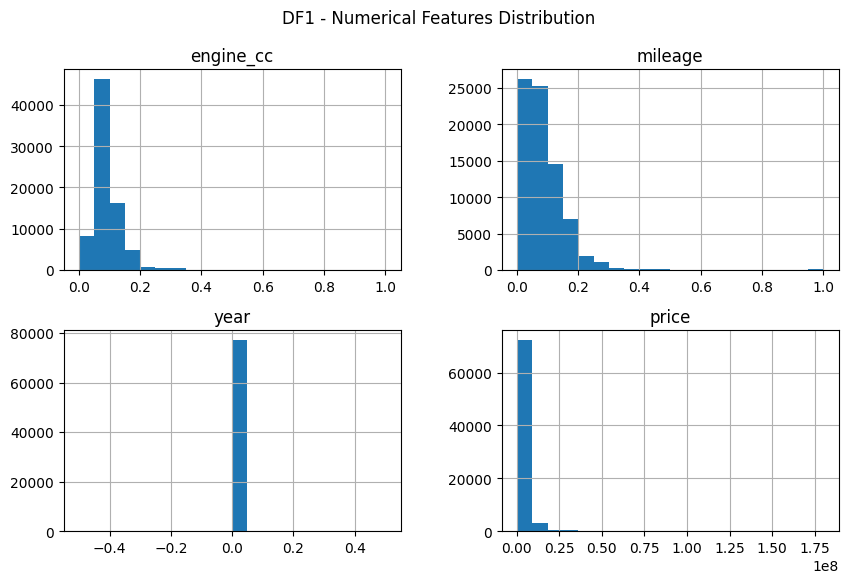

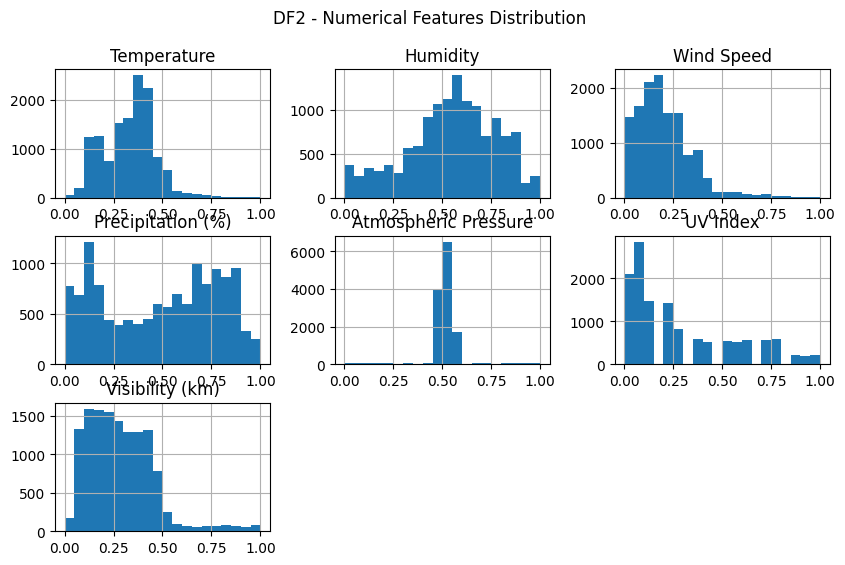

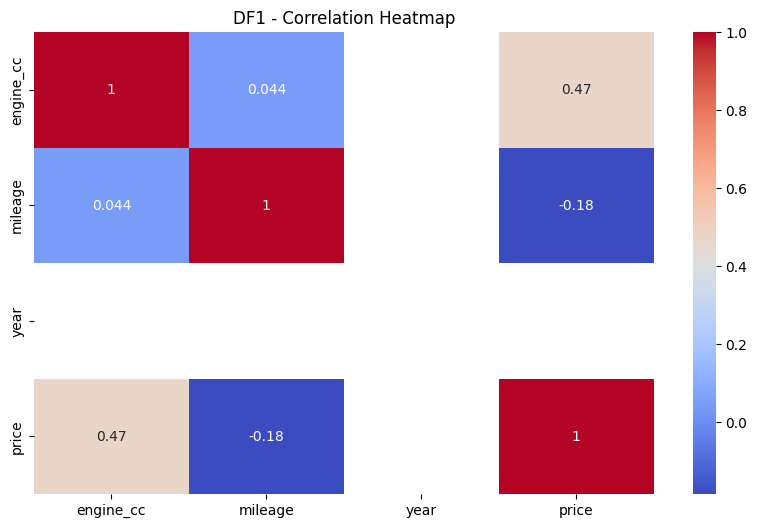

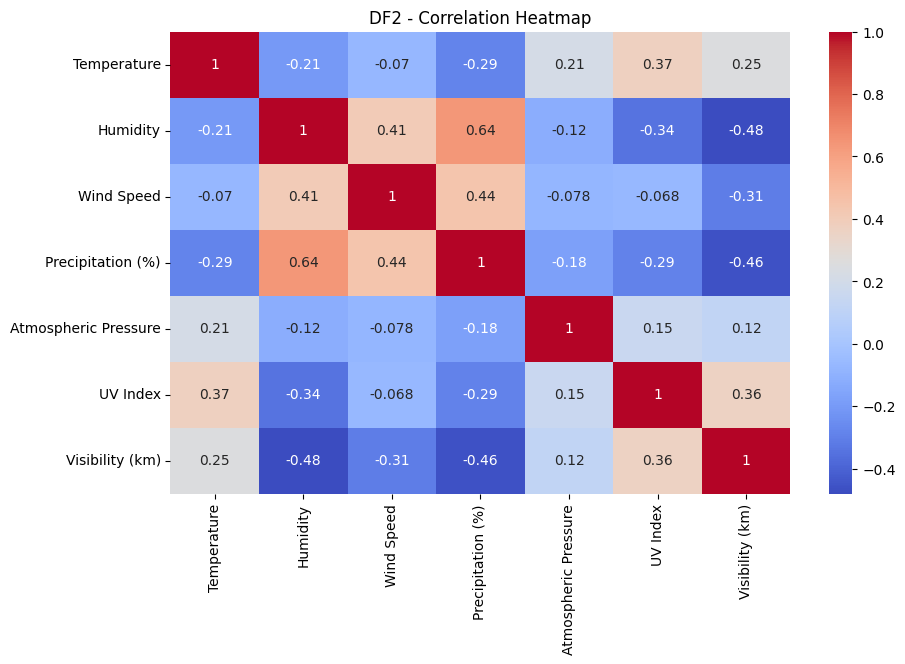

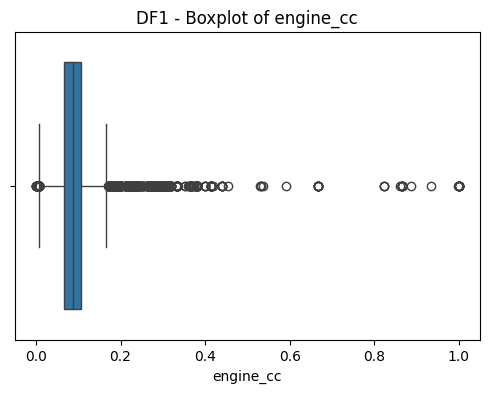

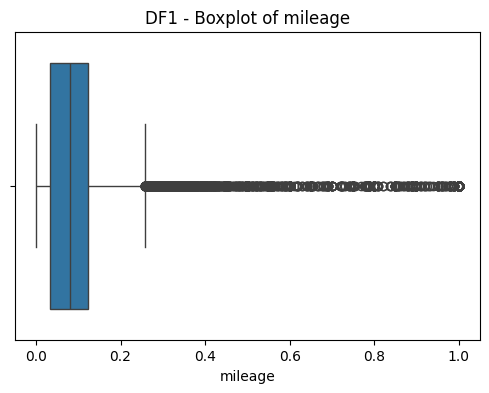

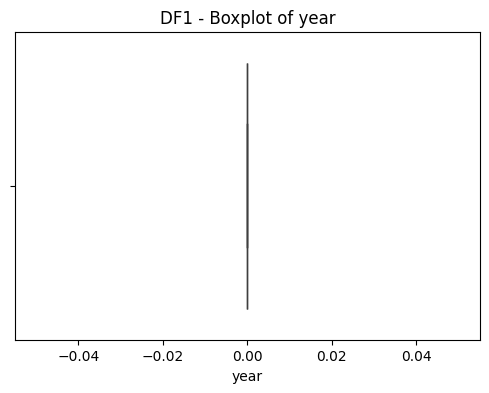

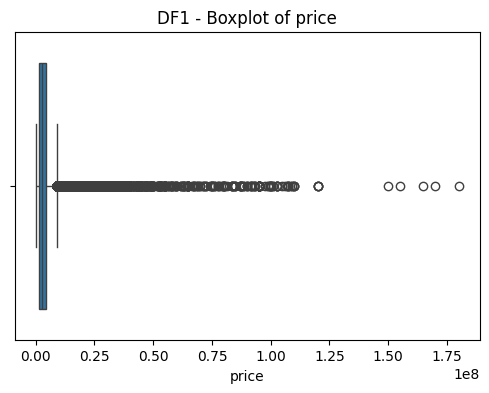

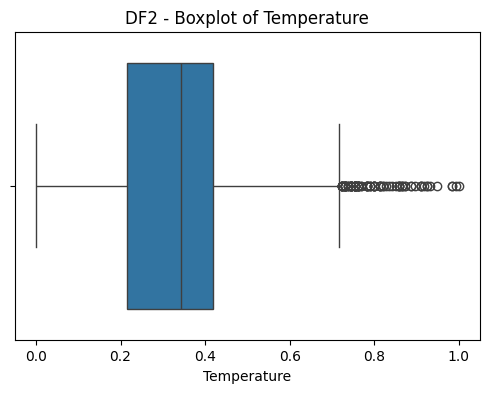

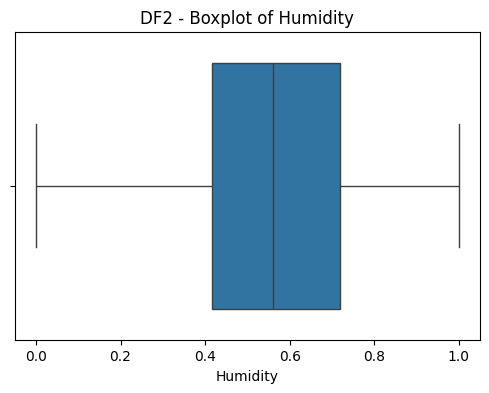

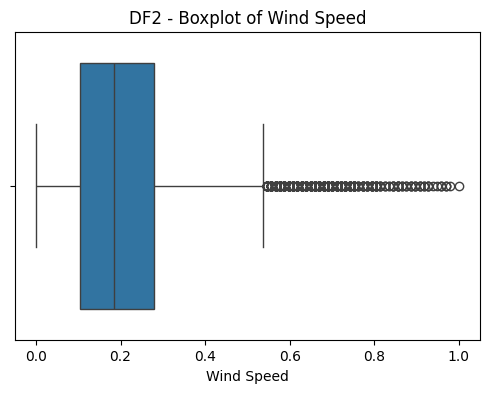

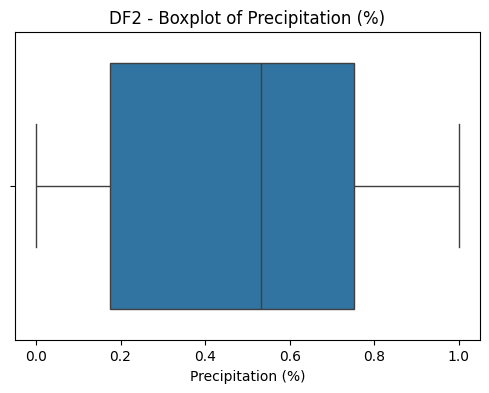

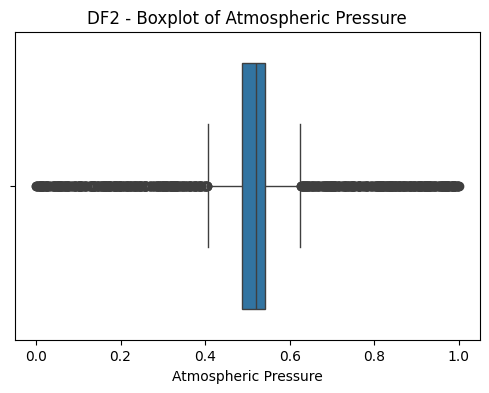

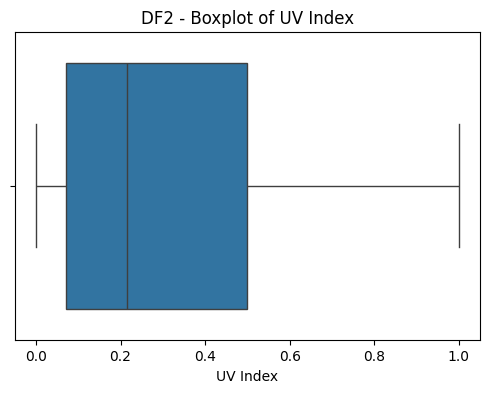

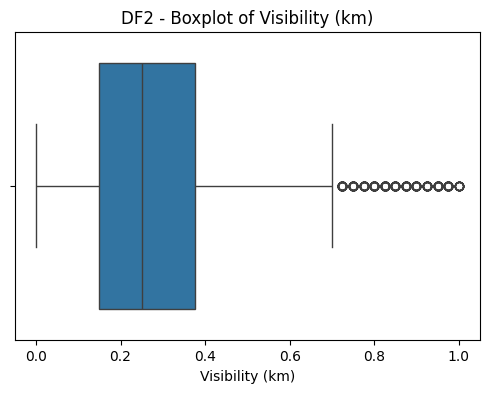

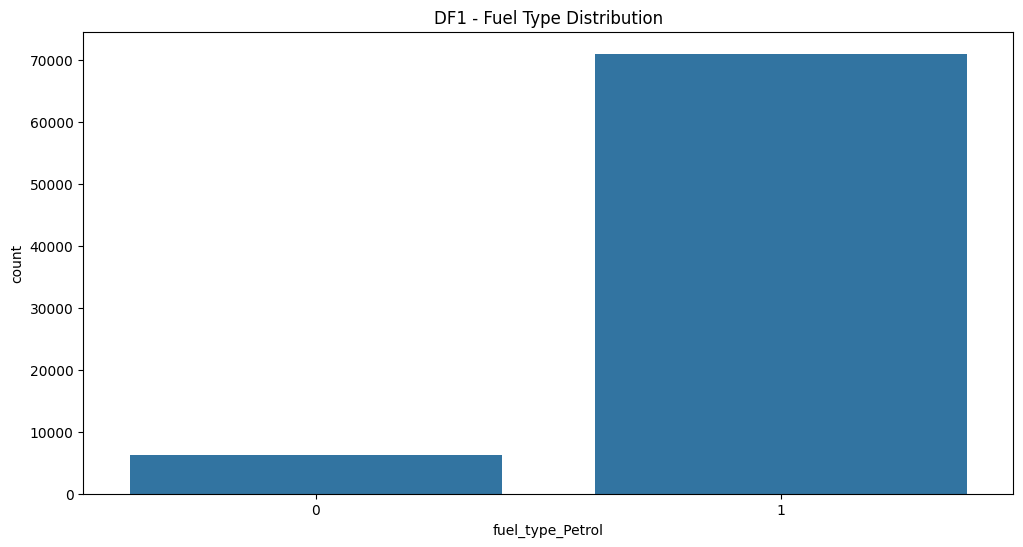

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Summary Statistics

print("Summary statistics for DF1:\n", df1_normalized.describe().T)
print("\nSummary statistics for DF2:\n", df2_normalized.describe().T)


# 2. Check distributions of numerical features

num_cols_df1 = ['engine_cc', 'mileage', 'year', 'price']
num_cols_df2 = ['Temperature', 'Humidity', 'Wind Speed', 
                'Precipitation (%)', 'Atmospheric Pressure', 
                'UV Index', 'Visibility (km)']

# Histograms for df1
df1_normalized[num_cols_df1].hist(figsize=(10, 6), bins=20)
plt.suptitle("DF1 - Numerical Features Distribution")
plt.show()

# Histograms for df2
df2_normalized[num_cols_df2].hist(figsize=(10, 6), bins=20)
plt.suptitle("DF2 - Numerical Features Distribution")
plt.show()


# 3. Correlation Heatmaps

plt.figure(figsize=(10,6))
sns.heatmap(df1_normalized[num_cols_df1].corr(), annot=True, cmap="coolwarm")
plt.title("DF1 - Correlation Heatmap")
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(df2_normalized[num_cols_df2].corr(), annot=True, cmap="coolwarm")
plt.title("DF2 - Correlation Heatmap")
plt.show()


# 4. Outlier Detection (Boxplots)

for col in num_cols_df1:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df1_normalized[col])
    plt.title(f"DF1 - Boxplot of {col}")
    plt.show()

for col in num_cols_df2:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df2_normalized[col])
    plt.title(f"DF2 - Boxplot of {col}")
    plt.show()


# 5. Category Analysis (only for df1 since df2 target is categorical)

plt.figure(figsize=(12,6))
sns.countplot(x='fuel_type_Petrol', data=df1_encoded)  
plt.title("DF1 - Fuel Type Distribution")
plt.show()


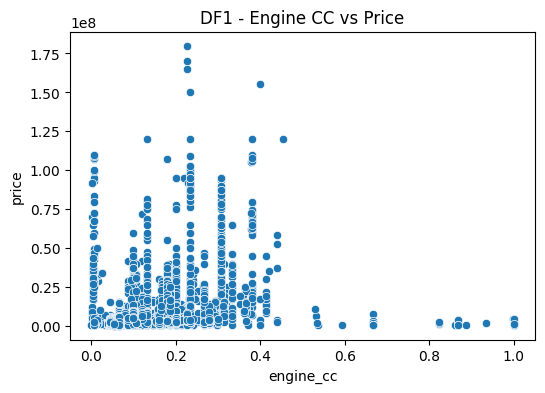

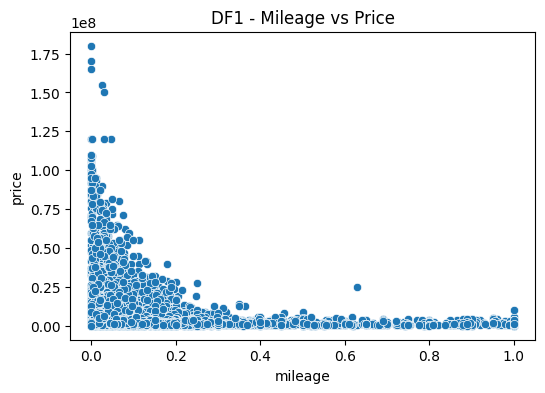

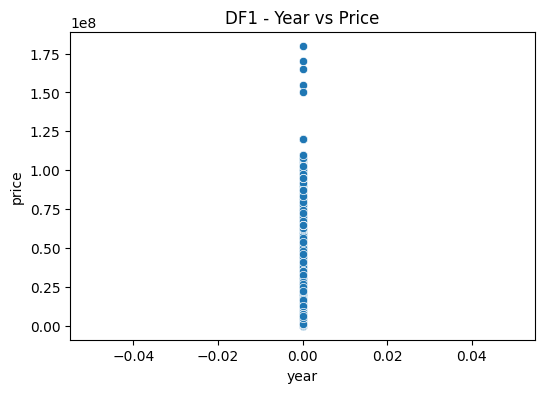

In [17]:
# Scatter plots for DF1
plt.figure(figsize=(6,4))
sns.scatterplot(x='engine_cc', y='price', data=df1_normalized)
plt.title("DF1 - Engine CC vs Price")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x='mileage', y='price', data=df1_normalized)
plt.title("DF1 - Mileage vs Price")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x='year', y='price', data=df1_normalized)
plt.title("DF1 - Year vs Price")
plt.show()


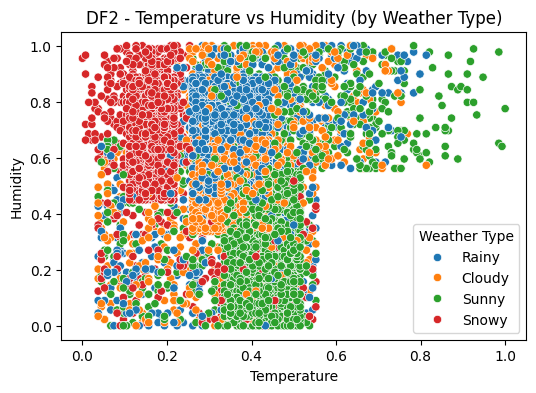

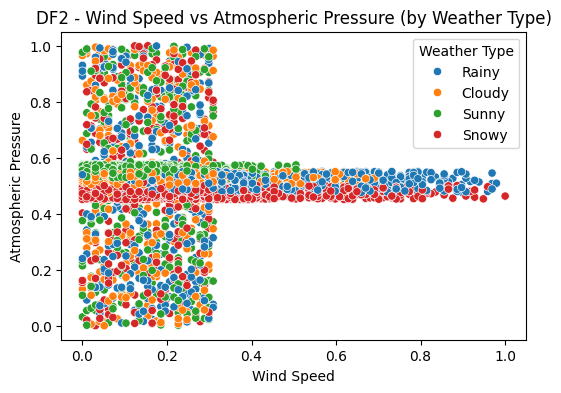

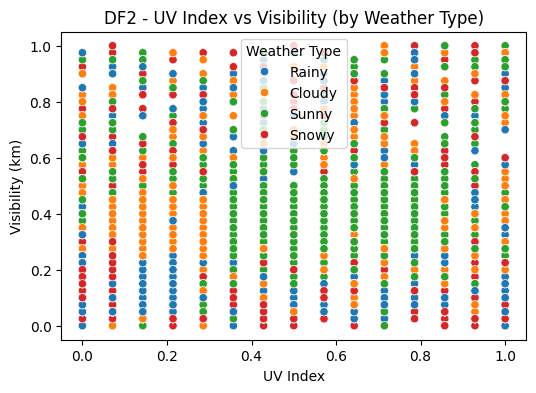

In [18]:
# Scatter plots for DF2
plt.figure(figsize=(6,4))
sns.scatterplot(x='Temperature', y='Humidity', data=df2_normalized, hue=df2['Weather Type'])
plt.title("DF2 - Temperature vs Humidity (by Weather Type)")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x='Wind Speed', y='Atmospheric Pressure', data=df2_normalized, hue=df2['Weather Type'])
plt.title("DF2 - Wind Speed vs Atmospheric Pressure (by Weather Type)")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x='UV Index', y='Visibility (km)', data=df2_normalized, hue=df2['Weather Type'])
plt.title("DF2 - UV Index vs Visibility (by Weather Type)")
plt.show()


Model Performance Comparison:
                      Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.865909   0.866955  0.865909  0.865772
Decision Tree        0.903788   0.903968  0.903788  0.903718
Random Forest        0.915530   0.915858  0.915530  0.915602


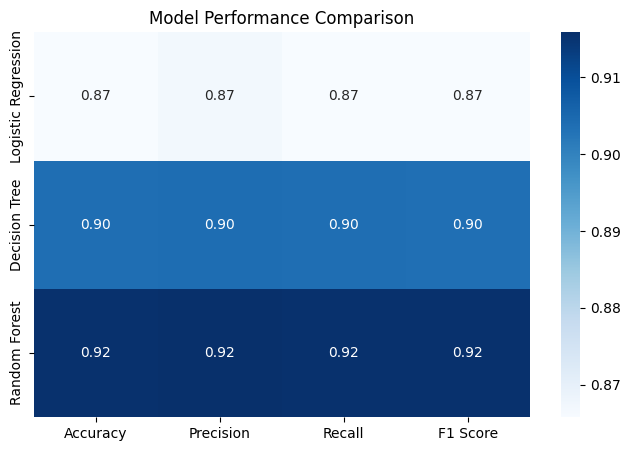

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Features & Target
X = df2_normalized.drop("Weather Type", axis=1)
y = df2["Weather Type"]

# Split (already done earlier, but repeating for clarity)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

results = {}

# Train & Evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1 Score": f1_score(y_test, y_pred, average='weighted')
    }

# Convert results to DataFrame for comparison
import pandas as pd
results_df = pd.DataFrame(results).T
print("Model Performance Comparison:\n", results_df)

# Heatmap for visualization
plt.figure(figsize=(8,5))
sns.heatmap(results_df, annot=True, cmap="Blues", fmt=".2f")
plt.title("Model Performance Comparison")
plt.show()
